<a href="https://colab.research.google.com/github/lindseyvanosky/Regression-Metrics-Exercise/blob/main/LV_Regression_Metrics_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression Metrics Exercise 
- Lindsey Vanosky 
- 06.29.22

##Imports & Inspection

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

filename = "/content/drive/MyDrive/Coding Dojo/02 Stack 2: Intro to Machine Learning/Data Sets/Boston_Housing_from_Sklearn.csv"
df = pd.read_csv(filename)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


##Determining Correlations

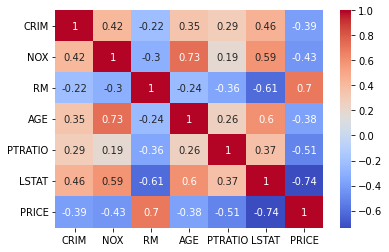

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = "coolwarm", annot = True);

##Definining Features

In [ ]:
#x features will be: RM, LSTAT and PTRATIO
y = df["PRICE"]
X = df[["RM", "LSTAT", "PTRATIO"]]

##Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

##Instantiation

In [ ]:
reg = LinearRegression()
scaler = StandardScaler()
reg_pipe = make_pipeline(scaler, reg)
reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

##Model Performance

###R2

In [ ]:
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

train_r2

0.6877966145058925

In [ ]:
test_r2

0.6331590458194678

Here we can see that the difference in performance between the train and test sets. The train set can explain 68% of the data, whereas the test set can explain 63% of the data. 

###MAE

In [ ]:
train_MAE = mean_absolute_error(y_train, train_pred)
test_MAE = mean_absolute_error(y_test, test_pred)

train_MAE

3.714054057158005

In [ ]:
test_MAE

3.3918448293813968

The MAE tells us that on average, our predictions were off by 3,714 for the training set and 3,391 on the test set. 

In [ ]:
mean_price = df["PRICE"].mean()
mean_price

22.532806324110677

In [ ]:
22.53/3.39

6.646017699115045

This results in an error percentage of 6%

###MSE

In [ ]:
train_MSE = mean_squared_error(y_train, train_pred)
train_MSE

27.68673681796949

In [ ]:
test_MSE = mean_squared_error(y_test, test_pred)
test_MSE

25.688824196675952

This MSE tells us that on average the train set was off by 27,686 and the test set was off by 25,688. These results are in dollars squared, so we can see that the larger errors are more heavily punished, but it doesn't tell us much beyond that. 

###RSME

In [ ]:
train_RMSE = np.sqrt(train_MSE)
train_RMSE

5.261818774717492

In [ ]:
test_RMSE = np.sqrt(test_MSE)
test_RMSE

5.068414367104958

The RMSE tells us that on average, our predictions had a variance of 5,068 on the test set and a variance of 5,261 on the train set. We know that the mean price is 22.53, so we can calculate the percentage of error. 

In [ ]:
22.53/5.261

4.282455806880821

Using the RMSE method actually shows our model to be more accurate than the MAE showed us. MAE resulted in a 6% difference, where the RMSE is only a 4% difference. 